In [30]:
# Importing required Python Packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTENC
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, accuracy_score, precision_score, recall_score, f1_score
from sklearn.svm import SVC
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.pipeline import Pipeline
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier

import warnings
warnings.filterwarnings('ignore')

In [31]:
# Importing dataset from a csv file
data = pd.read_csv('corrected_dataset.csv')

# Creating a copy of the original dataframe
baseDF = data.copy()

# Quick peek at the dataframe
baseDF.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Male,14,1.71,72.0,yes,yes,3,3,Sometimes,no,3,no,2,1,no,Walking,Normal_Weight
1,Female,15,1.65,86.0,yes,yes,3,3,Sometimes,no,1,no,3,2,no,Walking,Obesity_Type_I
2,Male,16,1.67,50.0,yes,yes,2,1,Frequently,no,3,no,1,0,no,Public_Transportation,Insufficient_Weight
3,Male,16,1.82,71.0,yes,yes,2,3,Frequently,no,2,no,2,1,Sometimes,Public_Transportation,Normal_Weight
4,Female,16,1.66,58.0,no,no,2,1,Sometimes,no,1,no,0,1,no,Walking,Normal_Weight


In [32]:
baseDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 513 entries, 0 to 512
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          513 non-null    object 
 1   Age                             513 non-null    int64  
 2   Height                          513 non-null    float64
 3   Weight                          513 non-null    float64
 4   family_history_with_overweight  513 non-null    object 
 5   FAVC                            513 non-null    object 
 6   FCVC                            513 non-null    int64  
 7   NCP                             513 non-null    int64  
 8   CAEC                            513 non-null    object 
 9   SMOKE                           513 non-null    object 
 10  CH2O                            513 non-null    int64  
 11  SCC                             513 non-null    object 
 12  FAF                             513 

In [33]:
# Converting Columns to proper values


# Replace numerical values with actual categories in corresponding columns

# FCVC: Frequency of consumption of vegetables: (1 = never, 2 = sometimes, 3 = always)
baseDF['FCVC'] = baseDF['FCVC'].replace({1: 'never', 2: 'sometimes', 3: 'always'})

# NCP: Number of main meals: (1 = between 1 and 2, 2 = three, 3 = more than three, 4 = no answer)
baseDF['NCP'] = baseDF['NCP'].replace({1: 'between 1 and 2', 2: 'three', 3: 'more than three', 4: 'no answer'})

# CH2O: Consumption of water daily: (1 = less than a liter, 2 = between 1 and 2 L, 3 = more than 2 L)
baseDF['CH2O'] = baseDF['CH2O'].replace({1: 'less than a liter', 2: 'between 1 and 2 L', 3: 'more than 2 L'})

# FAF: Frequency of physical activity: (1 = never, 2 = once or twice a week, 3 = two or three times a week, 4 = four or five times a week)
baseDF['FAF'] = baseDF['FAF'].replace({0: 'never', 1: 'once or twice a week', 2: 'two or three times a week', 3: 'four or five times a week'})

# TUE: Time using electronic devices: (0 = none, 1 = less than an hour, 2 = between one and three hours, 3 = more than three hours)
baseDF['TUE'] = baseDF['TUE'].replace({0: 'none', 1: 'less than an hour', 2: 'between one and three hours', 3: 'more than three hours'})

baseDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 513 entries, 0 to 512
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          513 non-null    object 
 1   Age                             513 non-null    int64  
 2   Height                          513 non-null    float64
 3   Weight                          513 non-null    float64
 4   family_history_with_overweight  513 non-null    object 
 5   FAVC                            513 non-null    object 
 6   FCVC                            513 non-null    object 
 7   NCP                             513 non-null    object 
 8   CAEC                            513 non-null    object 
 9   SMOKE                           513 non-null    object 
 10  CH2O                            513 non-null    object 
 11  SCC                             513 non-null    object 
 12  FAF                             513 

In [34]:
baseDF.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Male,14,1.71,72.0,yes,yes,always,more than three,Sometimes,no,more than 2 L,no,two or three times a week,less than an hour,no,Walking,Normal_Weight
1,Female,15,1.65,86.0,yes,yes,always,more than three,Sometimes,no,less than a liter,no,four or five times a week,between one and three hours,no,Walking,Obesity_Type_I
2,Male,16,1.67,50.0,yes,yes,sometimes,between 1 and 2,Frequently,no,more than 2 L,no,once or twice a week,none,no,Public_Transportation,Insufficient_Weight
3,Male,16,1.82,71.0,yes,yes,sometimes,more than three,Frequently,no,between 1 and 2 L,no,two or three times a week,less than an hour,Sometimes,Public_Transportation,Normal_Weight
4,Female,16,1.66,58.0,no,no,sometimes,between 1 and 2,Sometimes,no,less than a liter,no,never,less than an hour,no,Walking,Normal_Weight


In [35]:
baseDF['NObeyesdad'].value_counts()

NObeyesdad
Normal_Weight          287
Overweight_Level_I      69
Overweight_Level_II     58
Obesity_Type_I          47
Insufficient_Weight     38
Obesity_Type_II         11
Obesity_Type_III         3
Name: count, dtype: int64

### Applying SMOTE-NC to generate Synthetci Data

In [36]:
# Identify categorical features
categorical_features = ['Gender', 'family_history_with_overweight', 'FAVC', 'FCVC', 'NCP', 'CAEC', 'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE', 'CALC', 'MTRANS']
categorical_indices = [baseDF.columns.get_loc(col) for col in categorical_features if col in baseDF.columns]

# Encode categorical columns if necessary
for col in categorical_features:
    if baseDF[col].dtype == 'object':
        encoder = LabelEncoder()
        baseDF[col] = encoder.fit_transform(baseDF[col])
        print(col + " : " + dict(zip(encoder.classes_, encoder.transform(encoder.classes_))).__str__())

# Apply SMOTENC
smotenc = SMOTENC(categorical_features=categorical_indices, random_state=42, k_neighbors=min(2, min(baseDF['NObeyesdad'].value_counts())-1))
X_resampled, y_resampled = smotenc.fit_resample(baseDF.drop('NObeyesdad', axis=1), baseDF['NObeyesdad'])


Gender : {'Female': 0, 'Male': 1}
family_history_with_overweight : {'no': 0, 'yes': 1}
FAVC : {'no': 0, 'yes': 1}
FCVC : {'always': 0, 'never': 1, 'sometimes': 2}
NCP : {'between 1 and 2': 0, 'more than three': 1, 'no answer': 2}
CAEC : {'Always': 0, 'Frequently': 1, 'Sometimes': 2, 'no': 3}
SMOKE : {'no': 0, 'yes': 1}
CH2O : {'between 1 and 2 L': 0, 'less than a liter': 1, 'more than 2 L': 2}
SCC : {'no': 0, 'yes': 1}
FAF : {'four or five times a week': 0, 'never': 1, 'once or twice a week': 2, 'two or three times a week': 3}
TUE : {'between one and three hours': 0, 'less than an hour': 1, 'none': 2}
CALC : {'Always': 0, 'Frequently': 1, 'Sometimes': 2, 'no': 3}
MTRANS : {'Automobile': 0, 'Bike': 1, 'Motorbike': 2, 'Public_Transportation': 3, 'Walking': 4}


In [37]:
resampled_data = pd.DataFrame(X_resampled, columns = baseDF.drop('NObeyesdad', axis=1).columns)
resampled_data['NObeyesdad'] = y_resampled

sampledDF = resampled_data.copy()
sampledDF.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,1,14,1.71,72.0,1,1,0,1,2,0,2,0,3,1,3,4,Normal_Weight
1,0,15,1.65,86.0,1,1,0,1,2,0,1,0,0,0,3,4,Obesity_Type_I
2,1,16,1.67,50.0,1,1,2,0,1,0,2,0,2,2,3,3,Insufficient_Weight
3,1,16,1.82,71.0,1,1,2,1,1,0,0,0,3,1,2,3,Normal_Weight
4,0,16,1.66,58.0,0,0,2,0,2,0,1,0,1,1,3,4,Normal_Weight


### Data Standardization

In [38]:
# No Null values are present.

# Data Standardization
# Age, Weight, Height are the only numerical columns
numerical_columns = ['Age', 'Height', 'Weight']

scaler = StandardScaler()
sampledDF[numerical_columns] = scaler.fit_transform(sampledDF[numerical_columns])

sampledDF.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,1,-1.527648,0.107455,-0.502570,1,1,0,1,2,0,2,0,3,1,3,4,Normal_Weight
1,0,-1.374288,-0.512293,-0.024423,1,1,0,1,2,0,1,0,0,0,3,4,Obesity_Type_I
2,1,-1.220928,-0.305711,-1.253944,1,1,2,0,1,0,2,0,2,2,3,3,Insufficient_Weight
3,1,-1.220928,1.243660,-0.536723,1,1,2,1,1,0,0,0,3,1,2,3,Normal_Weight
4,0,-1.220928,-0.409002,-0.980717,0,0,2,0,2,0,1,0,1,1,3,4,Normal_Weight


### Data Encoding

In [39]:
# Apply Label Encoding for the target Column
encoder = LabelEncoder()

sampledDF['NObeyesdad'] = encoder.fit_transform(sampledDF['NObeyesdad'])

sampledDF.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,1,-1.527648,0.107455,-0.502570,1,1,0,1,2,0,2,0,3,1,3,4,1
1,0,-1.374288,-0.512293,-0.024423,1,1,0,1,2,0,1,0,0,0,3,4,2
2,1,-1.220928,-0.305711,-1.253944,1,1,2,0,1,0,2,0,2,2,3,3,0
3,1,-1.220928,1.243660,-0.536723,1,1,2,1,1,0,0,0,3,1,2,3,1
4,0,-1.220928,-0.409002,-0.980717,0,0,2,0,2,0,1,0,1,1,3,4,1


#### Corresponding Obesity Levels representation after encoding

In [40]:
print("NObeyesdad" + " : " + dict(zip(encoder.classes_, encoder.transform(encoder.classes_))).__str__())

NObeyesdad : {'Insufficient_Weight': 0, 'Normal_Weight': 1, 'Obesity_Type_I': 2, 'Obesity_Type_II': 3, 'Obesity_Type_III': 4, 'Overweight_Level_I': 5, 'Overweight_Level_II': 6}


In [41]:
sampledDF['NObeyesdad'].value_counts()

NObeyesdad
1    287
2    287
0    287
5    287
6    287
4    287
3    287
Name: count, dtype: int64

### Correlation Matrix

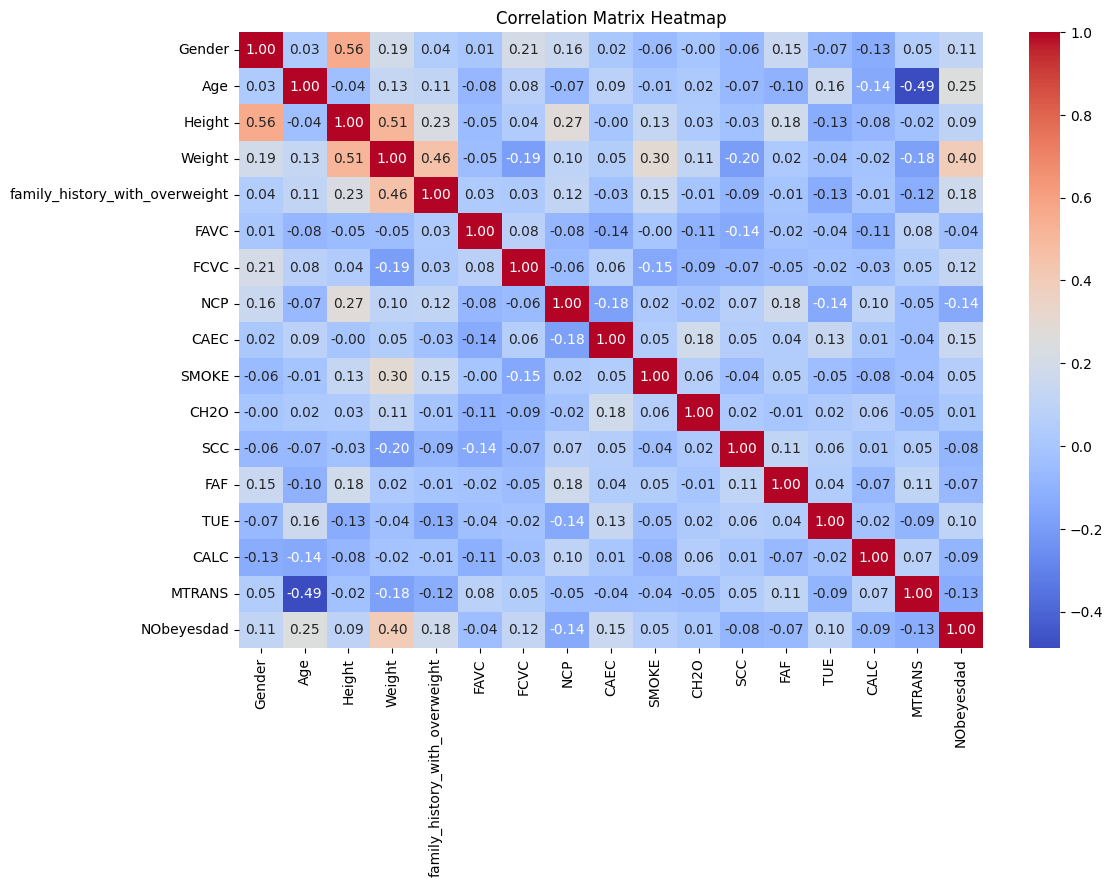

In [42]:
# Compute the correlation matrix
correlation_matrix = sampledDF.corr()

# Generate a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title('Correlation Matrix Heatmap')
plt.show()

#### Data Splitting

In [43]:
# Splitting the dataframe into features and target label
X = sampledDF.drop(columns = ['NObeyesdad'])
y = sampledDF['NObeyesdad']


### Logistic Regression with ANOVA F-test for feature selection

In [44]:

# Splitting the data into training and testing data
X_train_lr, X_test_lr, y_train_lr, y_test_lr = train_test_split(X, y, test_size = 0.3, random_state = 42)


# Defining a pipeline to search for best features and hyperparameters
pipeline_lr = Pipeline([
    ('selector', SelectKBest(f_classif)),
    ('classifier', LogisticRegression())
])

# Defining the parameters for grid search
# param_grid_lr = {
#     'selector__k': list(range(1, 11)),  # From 1 to 10 features
#     'classifier__C': np.logspace(-2, 2, num = 5, base = 2),
#     'classifier__penalty': ['l1', 'l2', 'elasticnet'], 
#     'classifier__max_iter': range(800, 1001, 50), 
#     'classifier__solver': ['saga'],
#     'classifier__multi_class':['ovr', 'multinomial']
# }

param_grid_lr = {
    'selector__k': [7],  # From 1 to 10 features
    'classifier__C': [4],
    'classifier__penalty': ['l1'], 
    'classifier__max_iter': [1000], 
    'classifier__solver': ['saga'],
    'classifier__multi_class':['multinomial']
}

# Create the GridSearchCV object
grid_search_lr = GridSearchCV(pipeline_lr, param_grid_lr, cv=5, scoring = 'accuracy', verbose=1)

# Fit the grid search to the data
grid_search_lr.fit(X_train_lr, y_train_lr)

# Best parameters and best score
print("Best parameters:", grid_search_lr.best_params_)
print("Best cross-validation score: {:.2f}".format(grid_search_lr.best_score_))

# Access the selector in the pipeline
selector_lr = grid_search_lr.best_estimator_.named_steps['selector']

# Get the boolean mask indicating the features selected
selected_features_mask_lr = selector_lr.get_support()

# Get the names of the selected features
selected_feature_names_lr = X.columns[selected_features_mask_lr]

print("Selected features:", selected_feature_names_lr)

# Evaluate the model on the test set
y_predicted_lr = grid_search_lr.predict(X_test_lr)
# print(classification_report(y_test_lr, y_predicted_lr))

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Best parameters: {'classifier__C': 4, 'classifier__max_iter': 1000, 'classifier__multi_class': 'multinomial', 'classifier__penalty': 'l1', 'classifier__solver': 'saga', 'selector__k': 7}
Best cross-validation score: 0.98
Selected features: Index(['Gender', 'Age', 'Height', 'Weight', 'family_history_with_overweight',
       'FCVC', 'SMOKE'],
      dtype='object')


#### Performance Evaluation of Logistic Regression

In [45]:
# Calculate overall metrics
accuracy_lr = accuracy_score(y_test_lr, y_predicted_lr)
precision_lr = precision_score(y_test_lr, y_predicted_lr, average='weighted')
recall_lr = recall_score(y_test_lr, y_predicted_lr, average='weighted')
f1_lr = f1_score(y_test_lr, y_predicted_lr, average='weighted')

print("Accuracy: {:.4f}".format(accuracy_lr))
print("Precision: {:.4f}".format(precision_lr))
print("Recall: {:.4f}".format(recall_lr))
print("F1 Score: {:.4f}".format(f1_lr))

Accuracy: 0.9801
Precision: 0.9804
Recall: 0.9801
F1 Score: 0.9800


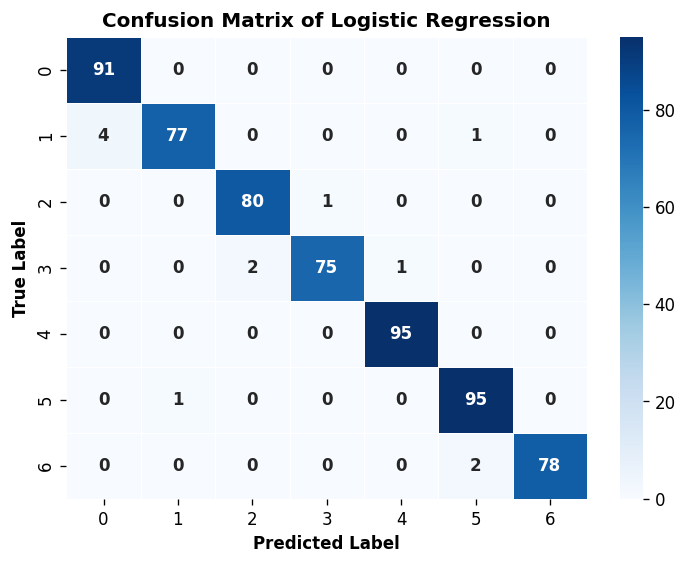

In [46]:
# Generate the confusion matrix
cm_lr = confusion_matrix(y_test_lr, y_predicted_lr)

# Plot the confusion matrix
plt.figure(figsize=(7, 5), dpi=120)  # Increase DPI here for better resolution
sns.heatmap(cm_lr, annot=True, fmt="d", linewidths=.5, cmap="Blues", annot_kws={"weight": "bold"})
plt.title('Confusion Matrix of Logistic Regression', weight='bold')  # Bold the title
plt.ylabel('True Label', weight='bold')  # Bold the y-label
plt.xlabel('Predicted Label', weight='bold')  # Bold the x-label
plt.show()

### Support Vector Machine (SVM) with ANOVA F-test for feature selection

In [47]:
# Splitting the dataset into training and testing
X_train_svm, X_test_svm, y_train_svm, y_test_svm = train_test_split(X, y, test_size=0.3, random_state=42)

# Define a pipeline to search for the best combination of feature selection and classifier hyperparameters
pipeline_svm = Pipeline([
    ('selector', SelectKBest(f_classif)),
    ('classifier', SVC())
])

# Define the parameter grid to search
# param_grid_svm = {
#     'selector__k': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],  # Choose 'k' values to test
#     'classifier__C': np.logspace(-3, 2, 6),  # SVM regularization parameter
#     'classifier__kernel': ['rbf', 'linear'],  # Type of SVM kernel
#     'classifier__gamma': ['scale', 'auto']  # Kernel coefficient
# }

param_grid_svm = {
    'selector__k': [8],  # Choose 'k' values to test
    'classifier__C': [100],  # SVM regularization parameter
    'classifier__kernel': ['linear'],  # Type of SVM kernel
    'classifier__gamma': ['scale']  # Kernel coefficient
}

# Create the GridSearchCV object
grid_search_svm = GridSearchCV(pipeline_svm, param_grid_svm, cv=5, scoring='accuracy', verbose=1)

# Fit the grid search to the data
grid_search_svm.fit(X_train_svm, y_train_svm)

# Print the best parameters and best score
print("Best parameters:", grid_search_svm.best_params_)
print("Best cross-validation score: {:.4f}".format(grid_search_svm.best_score_))

# Access the selector in the pipeline
selector_svm = grid_search_svm.best_estimator_.named_steps['selector']

# Get the boolean mask indicating the features selected
selected_features_mask_svm = selector_svm.get_support()

# Get the names of the selected features
selected_feature_names_svm = X.columns[selected_features_mask_svm]

print("Selected features:", selected_feature_names_svm)

# Evaluate the model on the test set
y_predicted_svm = grid_search_svm.predict(X_test_svm)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Best parameters: {'classifier__C': 100, 'classifier__gamma': 'scale', 'classifier__kernel': 'linear', 'selector__k': 8}
Best cross-validation score: 0.9907
Selected features: Index(['Gender', 'Age', 'Height', 'Weight', 'family_history_with_overweight',
       'FCVC', 'NCP', 'SMOKE'],
      dtype='object')


#### Performance Evaluation of Support Vector Machine

In [48]:
# Calculate overall metrics
accuracy_svm = accuracy_score(y_test_svm, y_predicted_svm)
precision_svm = precision_score(y_test_svm, y_predicted_svm, average='weighted')
recall_svm = recall_score(y_test_svm, y_predicted_svm, average='weighted')
f1_svm = f1_score(y_test_svm, y_predicted_svm, average='weighted')

print("Accuracy: {:.4f}".format(accuracy_svm))
print("Precision: {:.4f}".format(precision_svm))
print("Recall: {:.4f}".format(recall_svm))
print("F1 Score: {:.4f}".format(f1_svm))

Accuracy: 0.9917
Precision: 0.9918
Recall: 0.9917
F1 Score: 0.9917


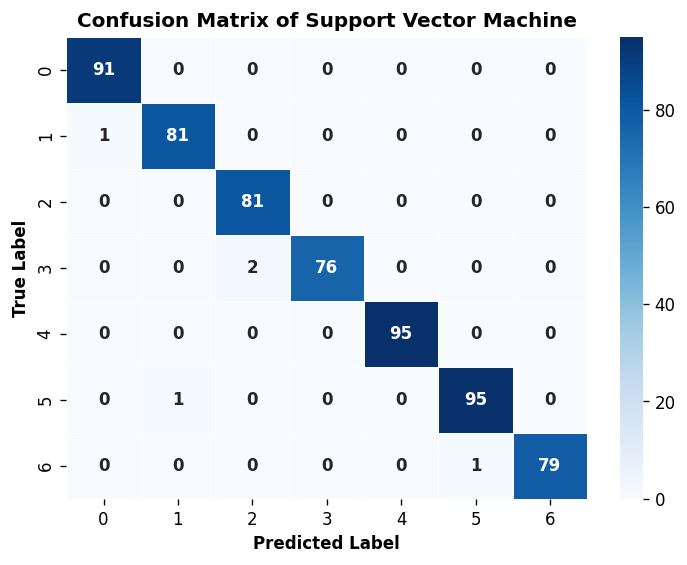

In [49]:
# Confusion Matrix
# Generate the confusion matrix
cm_svm = confusion_matrix(y_test_svm, y_predicted_svm)

# Plot the confusion matrix
plt.figure(figsize=(7, 5), dpi=120)
sns.heatmap(cm_svm, annot=True, fmt="d", linewidths=.5, cmap="Blues", annot_kws={"weight": "bold"})
plt.title('Confusion Matrix of Support Vector Machine', weight='bold')
plt.ylabel('True Label', weight='bold')
plt.xlabel('Predicted Label', weight='bold')
plt.show()

### Gradient Boost with ANOVA F-test for feature selection

In [50]:
# Splitting the dataset into training and testing
X_train_gb, X_test_gb, y_train_gb, y_test_gb = train_test_split(X, y, test_size=0.3, random_state=42)

# Define a pipeline to search for the best combination of feature selection and classifier hyperparameters
pipeline_gb = Pipeline([
    ('selector', SelectKBest(f_classif)),
    ('classifier', GradientBoostingClassifier(random_state=42))
])

# Defining the parameters for grid search
# param_grid_gb = {
#     'selector__k': list(range(5, 11)),  # From 5 to 10 features
#     'classifier__n_estimators': [100, 200, 300],  # Number of boosting stages to perform
#     'classifier__learning_rate': [0.01, 0.1, 0.2],  # Learning rate shrinks the contribution of each tree
#     'classifier__max_depth': [3, 5, 7]  # Maximum depth of the individual regression estimators
# }

param_grid_gb = {
    'selector__k': [9],  # From 5 to 10 features
    'classifier__n_estimators': [200],  # Number of boosting stages to perform
    'classifier__learning_rate': [0.2],  # Learning rate shrinks the contribution of each tree
    'classifier__max_depth': [5]  # Maximum depth of the individual regression estimators
}

# Create the GridSearchCV object
grid_search_gb = GridSearchCV(pipeline_gb, param_grid_gb, cv=5, scoring='accuracy', verbose=1)

# Fit the grid search to the data
grid_search_gb.fit(X_train_gb, y_train_gb)

# Best parameters and best score
print("Best parameters:", grid_search_gb.best_params_)
print("Best cross-validation score: {:.4f}".format(grid_search_gb.best_score_))

# Access the selector in the pipeline
selector_gb = grid_search_gb.best_estimator_.named_steps['selector']

# Get the boolean mask indicating the features selected
selected_features_mask_gb = selector_gb.get_support()

# Get the names of the selected features
selected_feature_names_gb = X.columns[selected_features_mask_gb]

print("Selected features:", selected_feature_names_gb)

# Evaluate the model on the test set
y_predicted_gb = grid_search_gb.predict(X_test_gb)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Best parameters: {'classifier__learning_rate': 0.2, 'classifier__max_depth': 5, 'classifier__n_estimators': 200, 'selector__k': 9}
Best cross-validation score: 0.9680
Selected features: Index(['Gender', 'Age', 'Height', 'Weight', 'family_history_with_overweight',
       'FCVC', 'NCP', 'CAEC', 'SMOKE'],
      dtype='object')


#### Performance Evaluation of Gradient Boost

In [51]:
# Calculate overall metrics
accuracy_gb = accuracy_score(y_test_gb, y_predicted_gb)
precision_gb = precision_score(y_test_gb, y_predicted_gb, average='weighted')
recall_gb = recall_score(y_test_gb, y_predicted_gb, average='weighted')
f1_gb = f1_score(y_test_gb, y_predicted_gb, average='weighted')

print("Accuracy: {:.4f}".format(accuracy_gb))
print("Precision: {:.4f}".format(precision_gb))
print("Recall: {:.4f}".format(recall_gb))
print("F1 Score: {:.4f}".format(f1_gb))

Accuracy: 0.9685
Precision: 0.9685
Recall: 0.9685
F1 Score: 0.9684


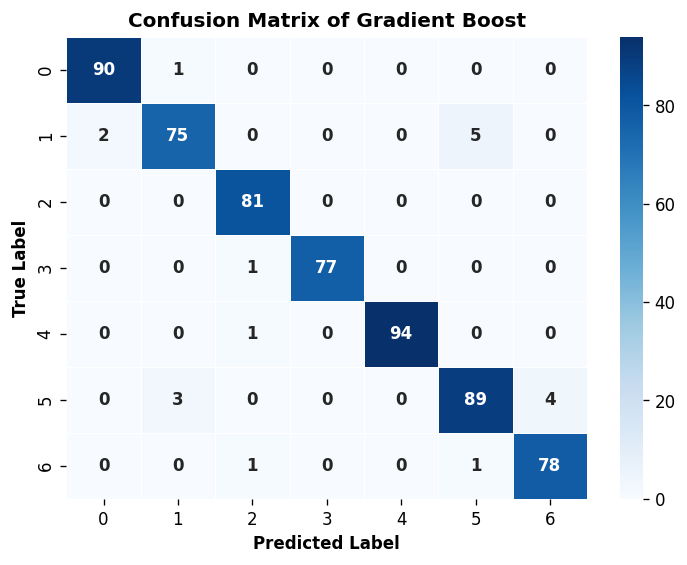

In [52]:
# Confusion Matrix
# Generate the confusion matrix
cm_gb = confusion_matrix(y_test_gb, y_predicted_gb)

# Plot the confusion matrix
plt.figure(figsize=(7, 5), dpi=120)
sns.heatmap(cm_gb, annot=True, fmt="d", linewidths=.5, cmap="Blues", annot_kws={"weight": "bold"})
plt.title('Confusion Matrix of Gradient Boost', weight='bold')
plt.ylabel('True Label', weight='bold')
plt.xlabel('Predicted Label', weight='bold')
plt.show()

### Random Forest with ANOVA F-test for feature selection

In [53]:

# Splitting the data into training and testing data
X_train_rf, X_test_rf, y_train_rf, y_test_rf = train_test_split(X, y, test_size=0.3, random_state=42)

# Defining a pipeline to search for best features and hyperparameters
pipeline = Pipeline([
    ('selector', SelectKBest(f_classif)),
    ('classifier', RandomForestClassifier())
])

# Defining the parameters for grid search
# param_grid_rf = {
#     'selector__k': list(range(1, 11)),  # From 1 to 10 features
#     'classifier__n_estimators': [100, 200, 300, 400],  # Number of trees in the forest
#     'classifier__max_depth': [None, 10, 20, 30],  # Maximum depth of the tree
#     'classifier__min_samples_split': [2, 5, 10],  # Minimum number of samples required to split an internal node
#     'classifier__min_samples_leaf': [1, 2, 4],  # Minimum number of samples required at each leaf node
#     'classifier__max_features': ['auto', 'sqrt', 'log2']  # Number of features to consider when looking for the best split
# }

param_grid_rf = {
    'selector__k': [8],  # From 1 to 10 features
    'classifier__n_estimators': [300],  # Number of trees in the forest
    'classifier__max_depth': [None],  # Maximum depth of the tree
    'classifier__min_samples_split': [2],  # Minimum number of samples required to split an internal node
    'classifier__min_samples_leaf': [1],  # Minimum number of samples required at each leaf node
    'classifier__max_features': ['log2']  # Number of features to consider when looking for the best split
}

# Create the GridSearchCV object
grid_search_rf = GridSearchCV(pipeline, param_grid_rf, cv=5, scoring='accuracy', verbose=1)

# Fit the grid search to the data
grid_search_rf.fit(X_train_rf, y_train_rf)

# Print best parameters and best score
print("Best parameters:", grid_search_rf.best_params_)
print("Best cross-validation score: {:.4f}".format(grid_search_rf.best_score_))

# Access the selector in the pipeline
selector_rf = grid_search_rf.best_estimator_.named_steps['selector']

# Get the boolean mask indicating the features selected
selected_features_mask_rf = selector_rf.get_support()

# Get the names of the selected features
selected_feature_names_rf = X.columns[selected_features_mask_rf]
print("Selected features:", selected_feature_names_rf)

# Evaluate the model on the test set
y_predicted_rf = grid_search_rf.predict(X_test_rf)
print(classification_report(y_test_rf, y_predicted_rf))




Fitting 5 folds for each of 1 candidates, totalling 5 fits
Best parameters: {'classifier__max_depth': None, 'classifier__max_features': 'log2', 'classifier__min_samples_leaf': 1, 'classifier__min_samples_split': 2, 'classifier__n_estimators': 300, 'selector__k': 8}
Best cross-validation score: 0.9502
Selected features: Index(['Gender', 'Age', 'Height', 'Weight', 'family_history_with_overweight',
       'FCVC', 'NCP', 'SMOKE'],
      dtype='object')
              precision    recall  f1-score   support

           0       0.97      0.96      0.96        91
           1       0.88      0.89      0.88        82
           2       0.96      1.00      0.98        81
           3       1.00      0.99      0.99        78
           4       1.00      1.00      1.00        95
           5       0.95      0.90      0.92        96
           6       0.92      0.95      0.93        80

    accuracy                           0.95       603
   macro avg       0.95      0.95      0.95       603
weigh

#### Performance Evaluation of Random Forest

In [54]:
# Calculate overall metrics
accuracy_rf = accuracy_score(y_test_rf, y_predicted_rf)
precision_rf = precision_score(y_test_rf, y_predicted_rf, average='weighted')
recall_rf = recall_score(y_test_rf, y_predicted_rf, average='weighted')
f1_rf = f1_score(y_test_rf, y_predicted_rf, average='weighted')

print("Accuracy: {:.4f}".format(accuracy_rf))
print("Precision: {:.4f}".format(precision_rf))
print("Recall: {:.4f}".format(recall_rf))
print("F1 Score: {:.4f}".format(f1_rf))


Accuracy: 0.9536
Precision: 0.9539
Recall: 0.9536
F1 Score: 0.9535


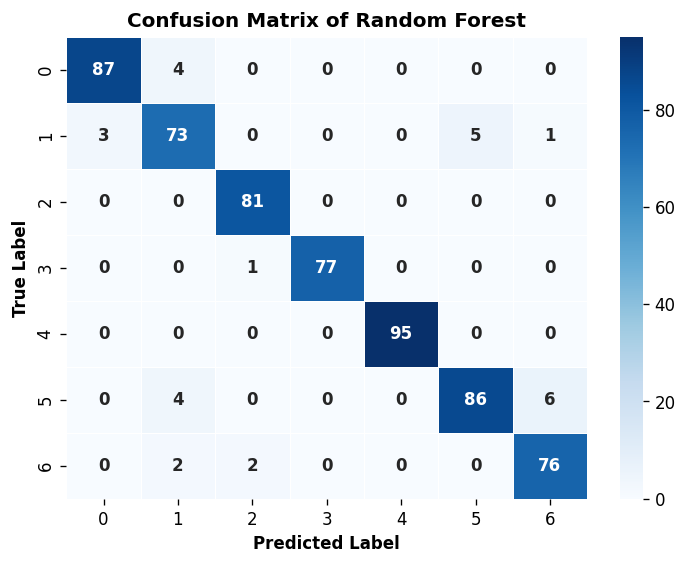

In [55]:
# Confusion Matrix
# Generate the confusion matrix
cm_rf = confusion_matrix(y_test_rf, y_predicted_rf)

# Plot the confusion matrix
plt.figure(figsize=(7, 5), dpi=120)
sns.heatmap(cm_rf, annot=True, fmt="d", linewidths=.5, cmap="Blues", annot_kws={"weight": "bold"})
plt.title('Confusion Matrix of Random Forest', weight='bold')
plt.ylabel('True Label', weight='bold')
plt.xlabel('Predicted Label', weight='bold')
plt.show()

### Neural Network with ANOVA F-test for feature selection

In [56]:

# Splitting the data into training and testing data
X_train_nn, X_test_nn, y_train_nn, y_test_nn = train_test_split(X, y, test_size=0.3, random_state=42)

# Defining a pipeline to search for best features and hyperparameters
pipeline_nn = Pipeline([
    ('selector', SelectKBest(f_classif)),  # Feature selection
    ('classifier', MLPClassifier(random_state=42))  # Neural network classifier
])

# Defining the parameters for grid search
# param_grid_nn = {
#     'selector__k': list(range(1, 11)),  # From 1 to 10 features
#     'classifier__hidden_layer_sizes': [(50,), (100,), (50, 50), (100, 50)],  # Different configurations of layers
#     'classifier__activation': ['tanh', 'relu'],  # Activation functions
#     'classifier__solver': ['sgd', 'adam'],  # Solver for weight optimization
#     'classifier__max_iter': range(800, 1001, 50), 
#     'classifier__learning_rate_init': [0.001, 0.01],  # Initial learning rate
# }

param_grid_nn = {
    'selector__k': [7],  # From 1 to 10 features
    'classifier__hidden_layer_sizes': [(50, 50)],  # Different configurations of layers
    'classifier__activation': ['relu'],  # Activation functions
    'classifier__solver': ['sgd'],  # Solver for weight optimization
    'classifier__max_iter': [800], 
    'classifier__learning_rate_init': [0.01],  # Initial learning rate
}

# Create the GridSearchCV object
grid_search_nn = GridSearchCV(pipeline_nn, param_grid_nn, cv=5, scoring='accuracy', verbose=1)

# Fit the grid search to the data
grid_search_nn.fit(X_train_nn, y_train_nn)

# Print best parameters and best score
print("Best parameters:", grid_search_nn.best_params_)
print("Best cross-validation score: {:.4f}".format(grid_search_nn.best_score_))

# Access the selector in the pipeline
selector_nn = grid_search_nn.best_estimator_.named_steps['selector']

# Get the boolean mask indicating the features selected
selected_features_mask_nn = selector_nn.get_support()

# Get the names of the selected features
selected_feature_names_nn = X.columns[selected_features_mask_nn]
print("Selected features:", selected_feature_names_nn)

# Evaluate the model on the test set
y_predicted_nn = grid_search_nn.predict(X_test_nn)
print(classification_report(y_test_nn, y_predicted_nn))




Fitting 5 folds for each of 1 candidates, totalling 5 fits
Best parameters: {'classifier__activation': 'relu', 'classifier__hidden_layer_sizes': (50, 50), 'classifier__learning_rate_init': 0.01, 'classifier__max_iter': 800, 'classifier__solver': 'sgd', 'selector__k': 7}
Best cross-validation score: 0.9893
Selected features: Index(['Gender', 'Age', 'Height', 'Weight', 'family_history_with_overweight',
       'FCVC', 'SMOKE'],
      dtype='object')
              precision    recall  f1-score   support

           0       0.94      0.99      0.96        91
           1       0.97      0.91      0.94        82
           2       0.99      1.00      0.99        81
           3       1.00      0.99      0.99        78
           4       1.00      1.00      1.00        95
           5       0.98      0.99      0.98        96
           6       1.00      0.99      0.99        80

    accuracy                           0.98       603
   macro avg       0.98      0.98      0.98       603
weighte

#### Performance Evaluation of Multi-Layered Perceptron

In [57]:
# Calculate overall metrics
accuracy_nn = accuracy_score(y_test_nn, y_predicted_nn)
precision_nn = precision_score(y_test_nn, y_predicted_nn, average='weighted')
recall_nn = recall_score(y_test_nn, y_predicted_nn, average='weighted')
f1_nn = f1_score(y_test_nn, y_predicted_nn, average='weighted')

print("Accuracy: {:.4f}".format(accuracy_nn))
print("Precision: {:.4f}".format(precision_nn))
print("Recall: {:.4f}".format(recall_nn))
print("F1 Score: {:.4f}".format(f1_nn))

Accuracy: 0.9818
Precision: 0.9821
Recall: 0.9818
F1 Score: 0.9817


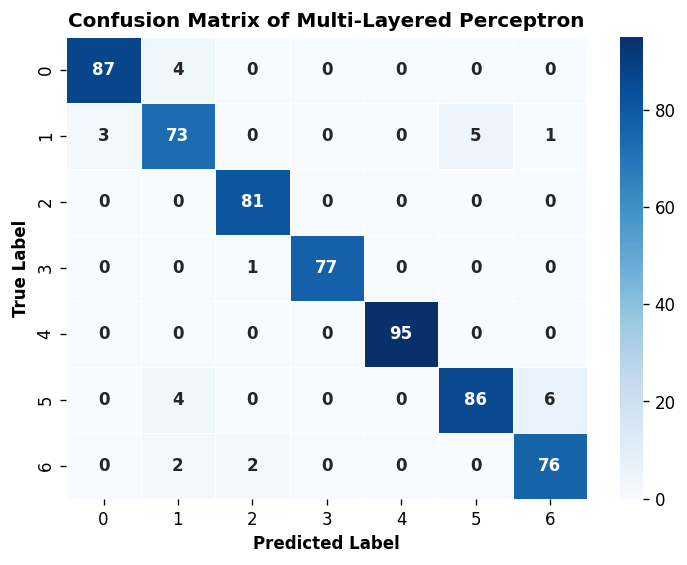

In [58]:
# Confusion Matrix
# Generate the confusion matrix
cm_nn = confusion_matrix(y_test_rf, y_predicted_rf)

# Plot the confusion matrix
plt.figure(figsize=(7, 5), dpi=120)
sns.heatmap(cm_nn, annot=True, fmt="d", linewidths=.5, cmap="Blues", annot_kws={"weight": "bold"})
plt.title('Confusion Matrix of Multi-Layered Perceptron', weight='bold')
plt.ylabel('True Label', weight='bold')
plt.xlabel('Predicted Label', weight='bold')
plt.show()